**1. Import Libraries and Load Data**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the datasets
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')


In [15]:
# Quick preview of datasets
print("Customers Dataset Preview:")
print(customers.head())
print("\nProducts Dataset Preview:")
print(products.head())
print("\nTransactions Dataset Preview:")
print(transactions.head())

Customers Dataset Preview:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset Preview:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset Preview:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54        

**2. Data Inspection and Cleaning**

In [16]:
# Check for missing values
print("\nMissing Values in Customers Dataset:")
print(customers.isnull().sum())
print("\nMissing Values in Products Dataset:")
print(products.isnull().sum())
print("\nMissing Values in Transactions Dataset:")
print(transactions.isnull().sum())

# Check for duplicates (if applicable)
print("\nDuplicates in Customers Dataset:", customers.duplicated().sum())
print("Duplicates in Products Dataset:", products.duplicated().sum())
print("Duplicates in Transactions Dataset:", transactions.duplicated().sum())


Missing Values in Customers Dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products Dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions Dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Duplicates in Customers Dataset: 0
Duplicates in Products Dataset: 0
Duplicates in Transactions Dataset: 0


In [17]:
# Display the data types of columns for each dataset
print("Data types in Customers dataset:")
print(customers.dtypes)

print("\nData types in Products dataset:")
print(products.dtypes)

print("\nData types in Transactions dataset:")
print(transactions.dtypes)


Data types in Customers dataset:
CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object

Data types in Products dataset:
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object

Data types in Transactions dataset:
TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object


In [18]:
# Convert Region and Category to categorical data type for memory efficiency
customers['Region'] = customers['Region'].astype('category')
products['Category'] = products['Category'].astype('category')

# Verify the changes
print(customers.dtypes)
print(products.dtypes)


CustomerID        object
CustomerName      object
Region          category
SignupDate        object
dtype: object
ProductID        object
ProductName      object
Category       category
Price           float64
dtype: object


In [19]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

**3. Exploratory Data Analysis (EDA)**





*   Customer Analysis



In [20]:
print(customers.describe())


                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00


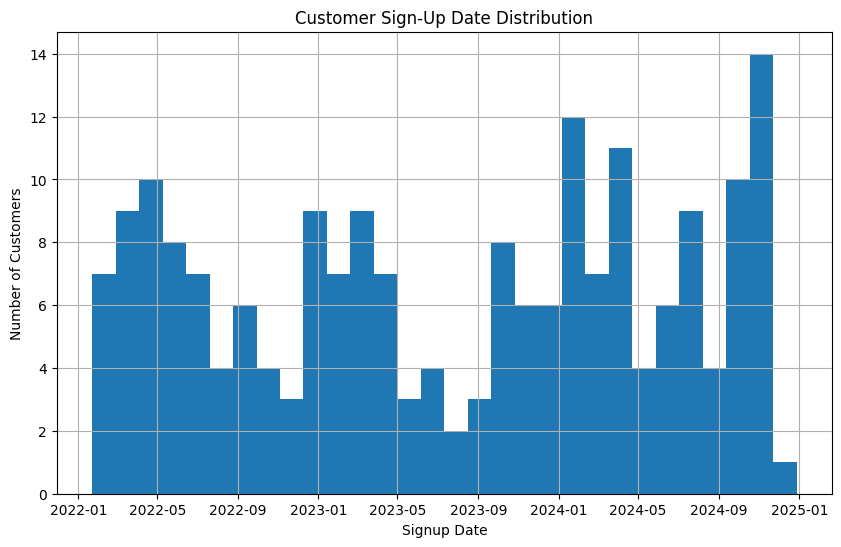

In [21]:
# Distribution of customer sign-ups over time
customers['SignupDate'].hist(bins=30, figsize=(10, 6))
plt.title('Customer Sign-Up Date Distribution')
plt.xlabel('Signup Date')
plt.ylabel('Number of Customers')
plt.show()



<ipython-input-22-2c35efa9a52b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=customers, palette='viridis')


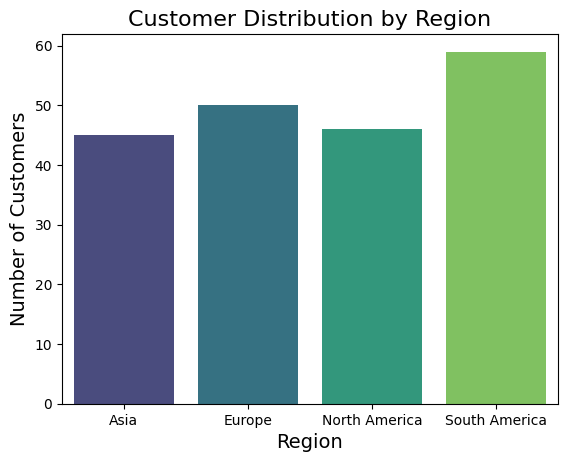

In [22]:
# Customer distribution by region
sns.countplot(x='Region', data=customers, palette='viridis')
plt.title('Customer Distribution by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.show()



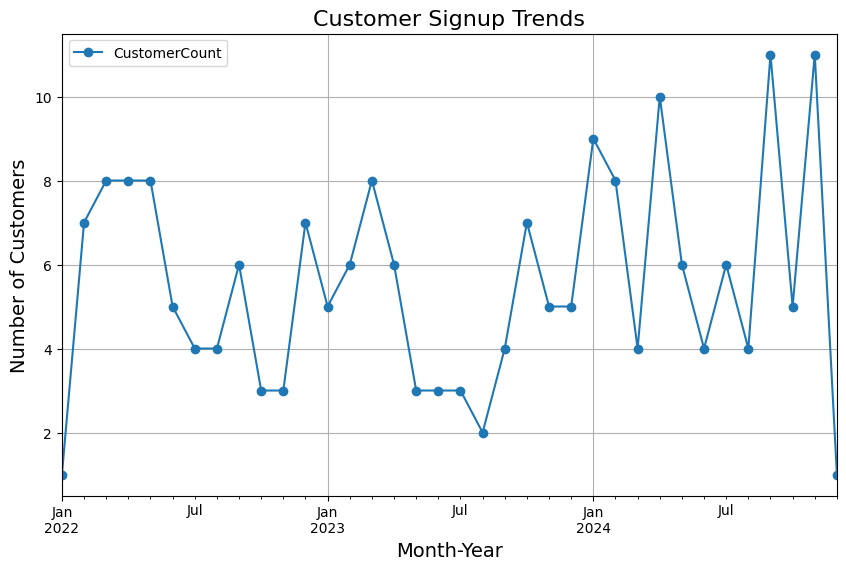

In [23]:
# Customer signup trends over time (monthly)
customers['SignupMonth'] = customers['SignupDate'].dt.to_period('M')
signup_trends = customers['SignupMonth'].value_counts().sort_index().reset_index()
signup_trends.columns = ['SignupMonth', 'CustomerCount']

signup_trends.plot(x='SignupMonth', y='CustomerCount', kind='line', marker='o', figsize=(10, 6))
plt.title('Customer Signup Trends', fontsize=16)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.grid(True)
plt.show()



*   Product Analysis



In [24]:
# Basic descriptive statistics for Products
print(products.describe())



            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


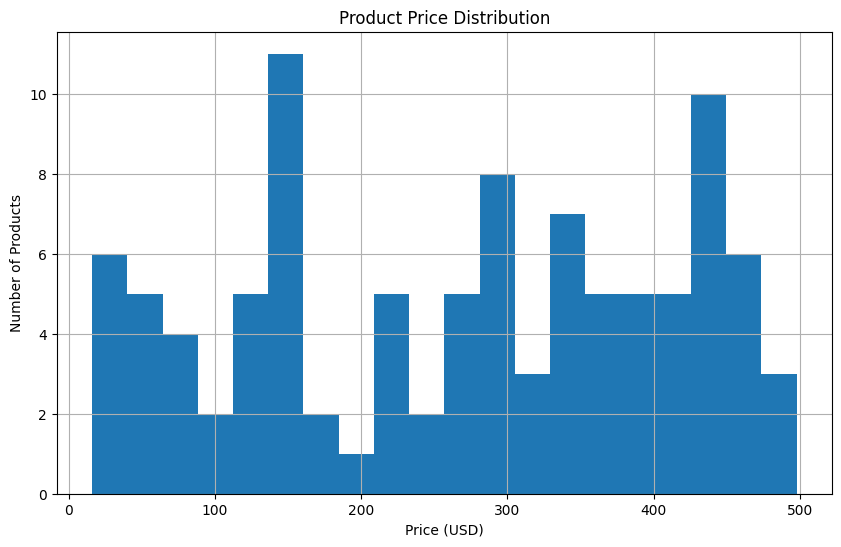

In [25]:
# Distribution of product prices
products['Price'].hist(bins=20, figsize=(10, 6))
plt.title('Product Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Number of Products')
plt.show()



<ipython-input-26-ede83db6b418>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=products, palette='viridis')


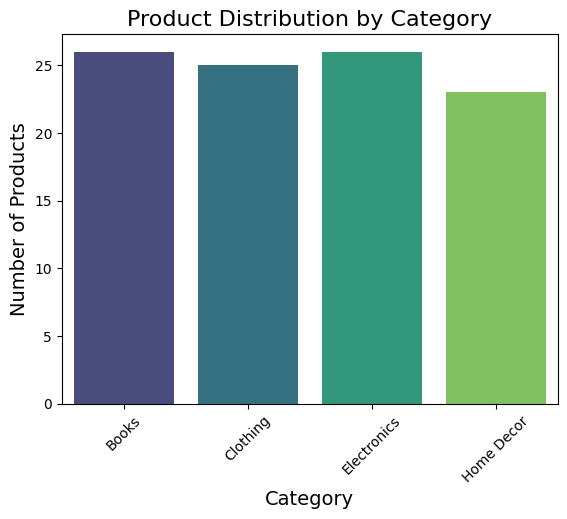

In [26]:
# Product category distribution
sns.countplot(x='Category', data=products, palette='viridis')
plt.title('Product Distribution by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Products', fontsize=14)
plt.xticks(rotation=45)
plt.show()



*  Transaction Analaysis



In [27]:

print(transactions.describe())



                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639


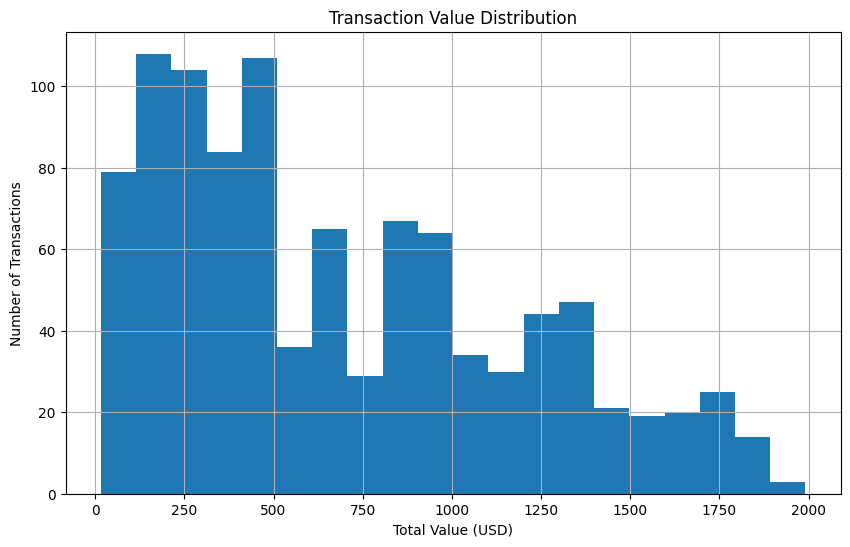

In [28]:

# Distribution of transaction values
transactions['TotalValue'].hist(bins=20, figsize=(10, 6))
plt.title('Transaction Value Distribution')
plt.xlabel('Total Value (USD)')
plt.ylabel('Number of Transactions')
plt.show()



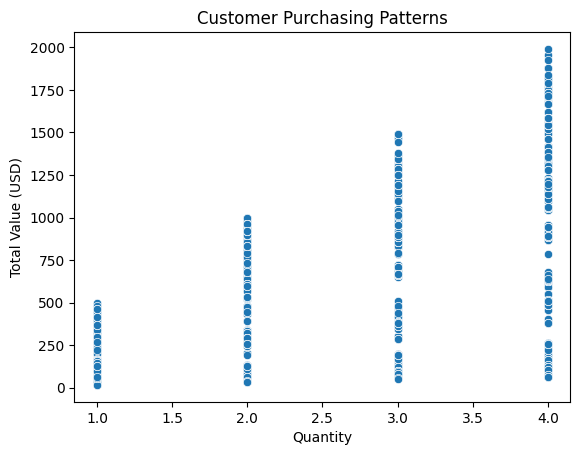

In [29]:
# Customer purchasing patterns - Scatter plot between Quantity and TotalValue
sns.scatterplot(x='Quantity', y='TotalValue', data=transactions)
plt.title('Customer Purchasing Patterns')
plt.xlabel('Quantity')
plt.ylabel('Total Value (USD)')
plt.show()



Top Products Based on Total Sales:
   ProductID  Quantity  TotalValue         ProductName
28      P029        45    19513.80  TechPro Headphones
78      P079        43    17946.91      ActiveWear Rug
47      P048        43    17905.20    TechPro Cookbook
19      P020        38    15060.92   ActiveWear Jacket
61      P062        39    14592.24     HomeSense Novel
   TransactionMonth  TransactionCount
0           2023-12                 4
1           2024-01               107
2           2024-02                77
3           2024-03                80
4           2024-04                86
5           2024-05                86
6           2024-06                69
7           2024-07                96
8           2024-08                94
9           2024-09                96
10          2024-10                70
11          2024-11                57
12          2024-12                78


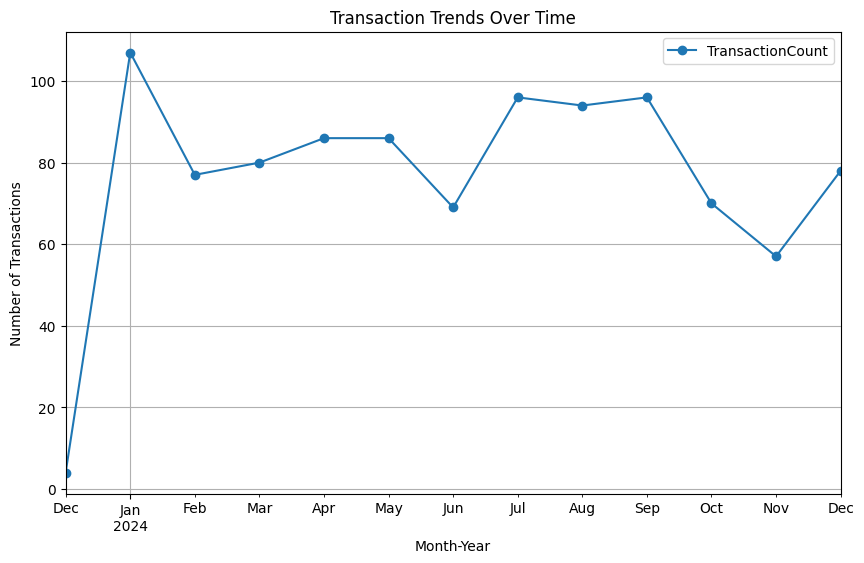

In [30]:
# Total sales by product (Aggregate transactions data)
product_sales = transactions.groupby('ProductID').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum'
}).reset_index()

# Merge with product names
product_sales = pd.merge(product_sales, products[['ProductID', 'ProductName']], on='ProductID')

# Sort by total sales value
top_products = product_sales.sort_values(by='TotalValue', ascending=False)

# Display top products based on total sales
print("Top Products Based on Total Sales:")
print(top_products.head())

# Transaction distribution by month
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')
transaction_months = transactions['TransactionMonth'].value_counts().sort_index().reset_index()
transaction_months.columns = ['TransactionMonth', 'TransactionCount']
print(transaction_months)

# Plot transaction trends over time
transaction_months.plot(x='TransactionMonth', y='TransactionCount', kind='line', marker='o', figsize=(10, 6))
plt.title('Transaction Trends Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()



<ipython-input-31-6760186ca27f>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_transactions = transaction_data.groupby('Region').agg({


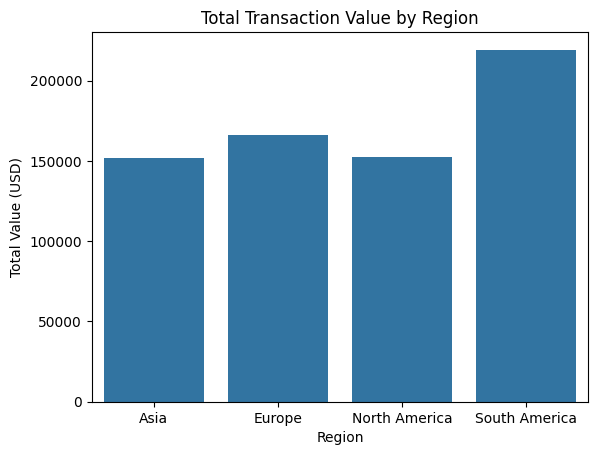

In [31]:
# Merge transactions with customers to get the Region information
transaction_data = pd.merge(transactions, customers[['CustomerID', 'Region']], on='CustomerID')

# Regional distribution of total transaction value
region_transactions = transaction_data.groupby('Region').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum'
}).reset_index()

# Plot total transaction value by region
sns.barplot(x='Region', y='TotalValue', data=region_transactions)
plt.title('Total Transaction Value by Region')
plt.xlabel('Region')
plt.ylabel('Total Value (USD)')
plt.show()


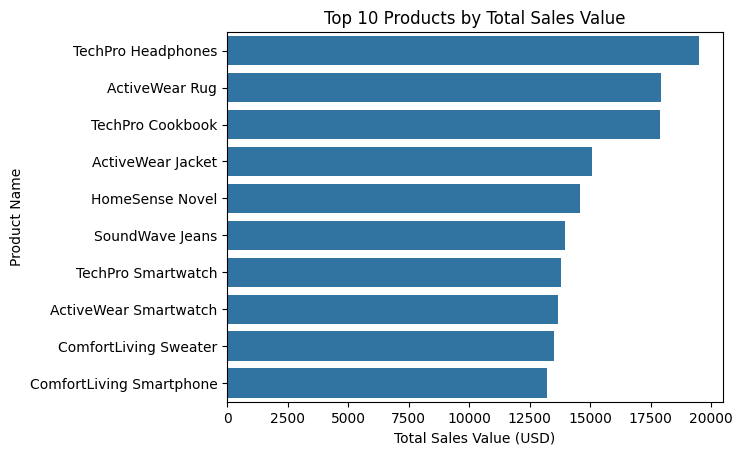

In [32]:


# Plot the top products by total sales value
sns.barplot(x='TotalValue', y='ProductName', data=top_products.head(10))
plt.title('Top 10 Products by Total Sales Value')
plt.xlabel('Total Sales Value (USD)')
plt.ylabel('Product Name')
plt.show()
